In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import folium
print("All libraries are imported")

All libraries are imported


In [11]:
from google.colab import files
uploaded=files.upload()


Saving AgeGroupDetails.csv to AgeGroupDetails (1).csv


In [12]:
agd=pd.read_csv('AgeGroupDetails.csv')
agd.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [13]:
from google.colab import files
uploaded=files.upload()

Saving covid_19_india.csv to covid_19_india (1).csv


In [14]:
from google.colab import files
uploaded=files.upload()

Saving HospitalBedsIndia.csv to HospitalBedsIndia (1).csv


In [16]:
from google.colab import files
uploaded=files.upload()

Saving ICMRTestingDetails.csv to ICMRTestingDetails (1).csv


In [17]:
from google.colab import files
uploaded=files.upload()

Saving ICMRTestingLabs.csv to ICMRTestingLabs (1).csv


In [18]:
from google.colab import files
uploaded=files.upload()

Saving IndividualDetails.csv to IndividualDetails (1).csv


In [19]:
from google.colab import files
uploaded=files.upload()

Saving population_india_census2011.csv to population_india_census2011 (1).csv


In [20]:
from google.colab import files
uploaded=files.upload()

Saving StatewiseTestingDetails.csv to StatewiseTestingDetails (1).csv


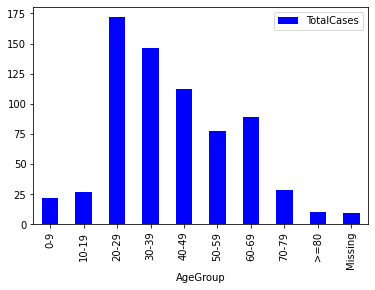

In [21]:
agd.plot(kind='bar',x='AgeGroup',y='TotalCases',color='blue')
plt.show()


As we can see from the above bar plot that the most effected people and the total cases are from the age group 20-29 which is 172 cases.

In [22]:
id=pd.read_csv('IndividualDetails.csv')
id.head(20)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
5,5,NaN,03/03/2020,69,M,Jaipur,Italians*,Rajasthan,Italy,03/03/2020,Travelled from Italy
6,6,NaN,04/03/2020,55,NaN,Gurugram,Italians*,Haryana,Italy,29/03/2020,Travelled from Italy
7,7,NaN,04/03/2020,55,NaN,Gurugram,Italians*,Haryana,Italy,29/03/2020,Travelled from Italy
8,8,NaN,04/03/2020,55,NaN,Gurugram,Italians*,Haryana,Italy,29/03/2020,Travelled from Italy
9,9,NaN,04/03/2020,55,NaN,Gurugram,Italians*,Haryana,Italy,29/03/2020,Travelled from Italy


In [23]:
id.shape

(18032, 11)

In [24]:
id.dropna(inplace=True)
id.isnull().sum()

id                    0
government_id         0
diagnosed_date        0
age                   0
gender                0
detected_city         0
detected_district     0
detected_state        0
nationality           0
status_change_date    0
notes                 0
dtype: int64

In [25]:
id.shape

(254, 11)

In [26]:
id.head(20)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
28,28,DL-P2,05/03/2020,27,M,Janakpuri,South West Delhi,Delhi,India,05/03/2020,"Travelled from Italy PayTm Emp,"
33,33,TN-P1,07/03/2020,45,M,Kancheepuram,Kancheepuram,Tamil Nadu,India,07/03/2020,Travelled from Oman to Chennai Airport on 28.0...
34,34,KL-PT-P1,08/03/2020,24,M,Ranni,Pathanamthitta,Kerala,India,27/03/2020,Travelled from Italy on 29/02/2020 through Doha
35,35,KL-PT-P1,08/03/2020,54,M,Ranni,Pathanamthitta,Kerala,India,29/03/2020,Travelled from Italy on 29/02/2020 through Doha
36,36,KL-P1-P1,08/03/2020,53,F,Ranni,Pathanamthitta,Kerala,India,29/03/2020,Travelled from Italy on 29/02/2020 through Doha
37,37,KL-PT-P2,08/03/2020,65,M,Ranni,Pathanamthitta,Kerala,India,29/03/2020,Relative and neighbour of P35-P37
38,38,KL-PT-P2,08/03/2020,61,F,Ranni,Pathanamthitta,Kerala,India,29/03/2020,Relative and neighbour of P35-P37


In [27]:
print(id.groupby('age').size())

age
1     1
10    1
11    1
13    1
14    2
     ..
76    1
8     1
89    1
9     1
96    1
Length: 68, dtype: int64


In [28]:
print(id.groupby('detected_city').size())

detected_city
Ahmednagar       1
Anna Nagar       1
Ashok Vihar      1
Balkampet        1
Banga            1
                ..
Vijayawada       3
Visakapatnam     1
Visakhapatnam    2
Walajapet        1
West Mambalam    1
Length: 101, dtype: int64


In [29]:
print(id.groupby('nationality').size())

nationality
India        249
Indonesia      3
Thailand       2
dtype: int64


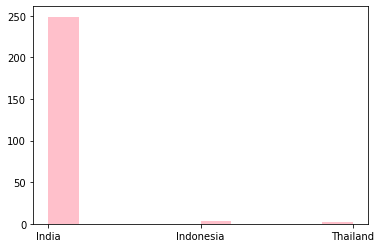

In [30]:
x=id['gender']
y=id['nationality']
plt.hist(y,color='pink',bins=10)
plt.title("")
plt.show()

As we can see from the above histogram the largest number of patients dignosed from covid-19 are the Indians who travelled from different country to India.The lowest consist of Indonesian followed by Thailand.The indian pateints are 249 as per the data.


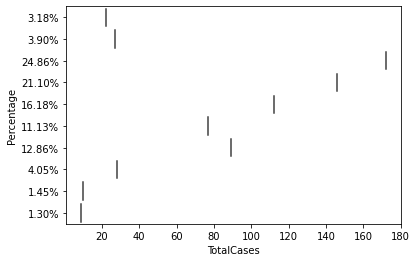

In [31]:
sns.violinplot(x='TotalCases',y='Percentage',data=agd,size=6)


from the above violin plot we can see the percentage of the total cases diagnosed.

In [32]:
cov=pd.read_csv('covid_19_india.csv')
cov.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [33]:
print(cov.groupby('State/UnionTerritory').sum())

                               Sno  Cured  Deaths  Confirmed
State/UnionTerritory                                        
Andaman and Nicobar Islands  23867    137       0        329
Andhra Pradesh               26860    829     241      10947
Arunachal Pradesh            20202      4       0         22
Assam                        21317    124      14        675
Bihar                        25182    462      41       1722
Chandigarh                   26010    166       0        574
Chhattisgarh                 25937    329       0        601
Delhi                        27652   3480     596      29255
Goa                          24075     80       0        187
Gujarat                      25828   1557     900      20425
Haryana                      27690   1371      54       4476
Himachal Pradesh             25666    217      32        645
Jammu and Kashmir            27633    668      95       5730
Jharkhand                    20353     16      27        468
Jharkhand#              

In [34]:
print(cov.groupby('Date').sum())

            Sno  Cured  Deaths  Confirmed
Date                                     
01/02/20      3      0       0          2
01/03/20     32      0       0          3
01/04/20  15776    144      41       1834
02/02/20      4      0       0          3
02/03/20    102      0       0          5
...         ...    ...     ...        ...
29/03/20  12420     96      27       1024
30/01/20      1      0       0          1
30/03/20  13650    102      31       1251
31/01/20      2      0       0          1
31/03/20  14434    124      35       1397

[86 rows x 4 columns]


In [35]:
cov.dropna(inplace=True)
cov.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [36]:
print(cov.groupby('Confirmed').sum())

             Sno  Cured  Deaths
Confirmed                      
0           7567      0       0
1          73345      4       0
2          43273     31       4
3          14941     23      11
4           8224     12       1
...          ...    ...     ...
4203        1143    507     223
4669        1176    572     232
5221        1209    722     251
5652        1241    789     269
6430        1273    840     283

[365 rows x 3 columns]


In [37]:
print(cov.groupby('Deaths').sum())

           Sno  Cured  Confirmed
Deaths                          
0       360851   1862       9091
1       118243   1050       7299
2        41872   1238       7844
3        60929   4966      18937
4        17165    360       5366
...        ...    ...        ...
223       1143    507       4203
232       1176    572       4669
251       1209    722       5221
269       1241    789       5652
283       1273    840       6430

[73 rows x 3 columns]


In [43]:
conf_sum=cov['Confirmed'].sum()
conf_sum

257686

In [44]:
cured_sum=cov['Cured'].sum()
cured_sum

35568

In [45]:
deaths_sum=cov['Deaths'].sum()
deaths_sum

7961

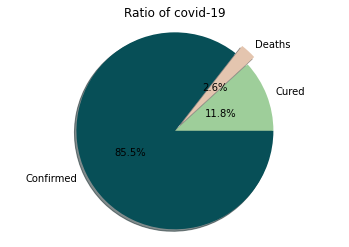

In [46]:
color_list=['#9ECE9A','#E4C5AF','#074F57']
my_explode=(0,0.1,0)
my_data=[cured_sum,deaths_sum,conf_sum]
my_labels='Cured','Deaths','Confirmed'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',shadow=True,pctdistance=0.5,colors=color_list,explode=my_explode)
plt.title('Ratio of covid-19')
plt.axis('equal')
plt.show()

We can see from above pie chart that the number of people who are dignosed from COVID-19 is 85.5% which is 2,57,686 poeple.The death ratio is 2.6% that is 7961 people and cured ratio is 11.8% which is 35,568 people.

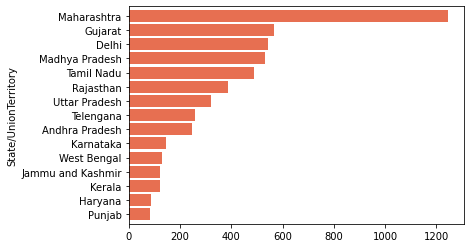

In [47]:
x=cov.groupby('State/UnionTerritory')['Confirmed'].mean().sort_values().tail(15)
x.plot(kind='barh',color='#e76f51',width=0.85)

The horizontal bar chart depicts that the highest number of COVID-19 patients are from Maharashtra followed by Gujarat and Delhi.


In [49]:
std=pd.read_csv('StatewiseTestingDetails.csv')
std.head(15)

,Date,State,TotalSamples,Negative,Positive
0,2020-02-17,Kerala,423,406.0,3
1,2020-02-18,Kerala,425,420.0,3
2,2020-02-19,Kerala,432,423.0,3
3,2020-02-20,Kerala,433,423.0,3
4,2020-02-21,Kerala,437,426.0,3
5,2020-02-22,Kerala,441,436.0,3
6,2020-02-23,Kerala,444,436.0,3
7,2020-02-24,Kerala,449,441.0,3
8,2020-02-25,Kerala,451,446.0,3
9,2020-02-26,Kerala,460,451.0,3


In [50]:
print(std.groupby('Date').sum())
print(std.groupby('State').sum())
print(std.groupby('Positive').sum())

            TotalSamples  Negative  Positive
Date                                        
2020-02-17           423     406.0         3
2020-02-18           425     420.0         3
2020-02-19           432     423.0         3
2020-02-20           433     423.0         3
2020-02-21           437     426.0         3
2020-02-22           441     436.0         3
2020-02-23           444     436.0         3
2020-02-24           449     441.0         3
2020-02-25           451     446.0         3
2020-02-26           460     451.0         3
2020-02-27           462     451.0         3
2020-02-28           471     463.0         3
2020-02-29           485     471.0         3
2020-03-01           537     520.0         3
2020-03-02           554     543.0         3
2020-03-03           570     544.0         3
2020-03-04           606     565.0         3
2020-03-05           628     589.0         3
2020-03-06           687     633.0         3
2020-03-07           742     672.0         4
2020-03-08

In [51]:
x=std.groupby('State')['Positive'].mean().sort_values().tail(10)
x

State
Punjab                84.400000
Kerala                95.462963
Jammu and Kashmir    129.625000
Tamil Nadu           151.951220
Gujarat              212.500000
Andhra Pradesh       240.750000
Madhya Pradesh       246.800000
Delhi                388.642857
Rajasthan            393.250000
Maharashtra          986.142857
Name: Positive, dtype: float64

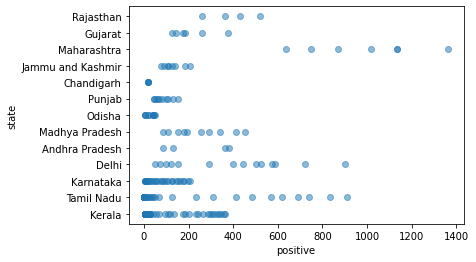

In [52]:
x=std['Positive']
y=std['State']
plt.scatter(x,y,alpha=0.5)
plt.xlabel('positive')
plt.ylabel('state')
plt.show()


According to the scatter plot we can see that the Maharashtra is leading the graph and the number of cases are increasing as the date increase.

In [54]:
latitude=19.663280 
longitude=75.300293
maharashtra_map=folium.Map(location=[latitude,longitude],zoom_start=12)
maharashtra_map

In [70]:
data = [[1,'maharashtra', 58449,19.663280,75.300293], [2,'Gujurat', 20425,23.00,72.00], [3,'Delhi', 29255,28,77],[4,'Madhya Pradesh',18590,23.30,80.00]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['id','city', 'confirmed_cases','latitude','longitude'])
df

,id,city,confirmed_cases,latitude,longitude
0,1,maharashtra,58449,19.66328,75.300293
1,2,Gujurat,20425,23.00000,72.000000
2,3,Delhi,29255,28.00000,77.000000
3,4,Madhya Pradesh,18590,23.30000,80.000000


In [71]:
m = folium.Map([19.663280,75.300293], zoom_start=11)
m

In [83]:
for index, row in df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude'],row['confirmed_cases']],
                        radius=15,
                        popup=row['city'],
                        fill_color="magenta", # divvy color
                       ).add_to(m)
m

The above map shows the cities having maximum number of COVID-19 patient that is Maharashtra followed by Gujarat,Delhi and Madhya Pradesh. 